In [1]:
## External Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
data = "annotations.csv"
df = pd.read_csv(data)
features = pd.read_csv(data, usecols = ['AU04_c', 'AU05_c', 'AU07_c','AU09_c','AU23_c','AU04_r', 'AU05_r', 'AU07_r','AU09_r','AU23_r'])

## convert target info into numbers
target = df['target']
LE = LabelEncoder()
target_nums = LE.fit_transform(target)

# build full list of features
features = features.columns.values.tolist()
features2 = df.columns.values.tolist()
features2 = features2[39:711]
features = features + features2

df = pd.read_csv(data, usecols = features)

In [3]:
## Use StandardScaler from sklearn to preprocess the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
scaled_df['target_nums'] = target_nums
scaled_df['target'] = target
print("Target nums: 0 = loud, 1 = subtle")

Target nums: 0 = loud, 1 = subtle


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_df.iloc[:,0:682])
reduced_data = {
    'component1': components[:,0],
    'component2': components[:,1],
    'target_nums': scaled_df['target_nums']}

reduced_df = pd.DataFrame(reduced_data, columns=['component1', 'component2', 'target_nums'])

In [5]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate

X = reduced_df.iloc[:, :-1]
Y = reduced_df['target_nums']

gmm = GaussianMixture(n_components=2, max_iter=100, random_state=2)
gmm.fit(X, Y)
kf = KFold(n_splits=5, shuffle=True, random_state=2)
res = cross_val_score(gmm, X, Y, scoring='accuracy', cv=kf)
print('Average accuracy: {}'.format(res.mean()))

res = cross_val_score(gmm, X, Y, scoring='precision_weighted', cv=kf)
print('Average precision: {}'.format(res.mean()))

res = cross_val_score(gmm, X, Y, scoring='recall_weighted', cv=kf)
print('Average recall: {}'.format(res.mean()))

res = cross_val_score(gmm, X, Y, scoring='f1_weighted', cv=kf)
print('Average F1: {}'.format(res.mean()))

Average accuracy: 0.44000000000000006
Average precision: 0.45928601998928675
Average recall: 0.44000000000000006
Average F1: 0.4354697449177552


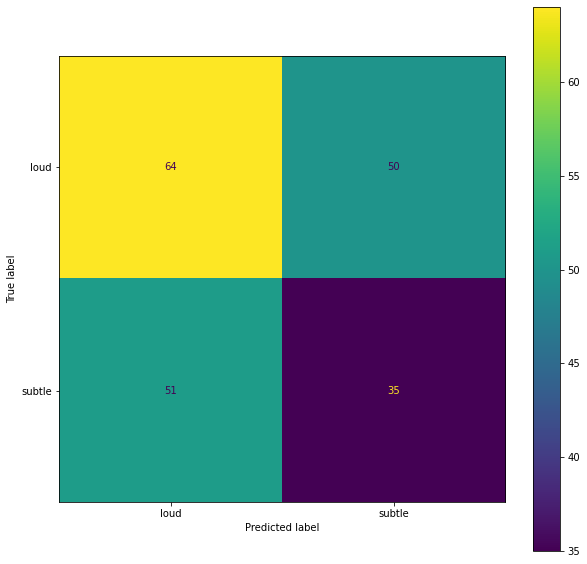

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Confusion matrix
Y_predict = gmm.predict(X)
Y_true = reduced_df['target_nums']
conf_matrix = confusion_matrix(Y_true, Y_predict)
conf_matrix_plot = ConfusionMatrixDisplay(conf_matrix, display_labels=scaled_df['target'].unique())
fig, ax = plt.subplots(figsize=(10,10))
conf_matrix_plot.plot(ax=ax)

In [7]:
from sklearn import svm
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

svc = svm.SVC(random_state=45)
svc.fit(X, Y)

kf = KFold(n_splits=5, shuffle=True, random_state=45)
res = cross_val_score(svc, X, Y, scoring='accuracy', cv=kf)
print('Average accuracy: {}'.format(res.mean()))

res = cross_val_score(svc, X, Y, scoring='precision_weighted', cv=kf)
print('Average precision: {}'.format(res.mean()))

res = cross_val_score(svc, X, Y, scoring='recall_weighted', cv=kf)
print('Average recall: {}'.format(res.mean()))

res = cross_val_score(svc, X, Y, scoring='f1_weighted', cv=kf)
print('Average F1: {}'.format(res.mean()))

Average accuracy: 0.54
Average precision: 0.4831519409709065
Average recall: 0.54
Average F1: 0.4925068020798017


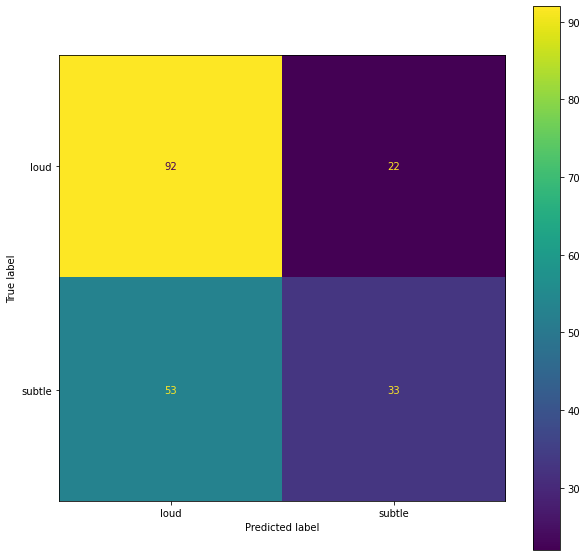

In [8]:
svc.fit(X, Y)
Y_predict = svc.predict(X)
Y_true = reduced_df['target_nums']
conf_matrix = confusion_matrix(Y_true, Y_predict)
conf_matrix_plot = ConfusionMatrixDisplay(conf_matrix, display_labels=scaled_df['target'].unique())
fig, ax = plt.subplots(figsize=(10,10))
conf_matrix_plot.plot(ax=ax)

In [9]:
## identifying unknowns
unknown_data = "unlabeled.csv"
u_df = pd.read_csv(unknown_data)
features = pd.read_csv(unknown_data, usecols = ['AU04_c', 'AU05_c', 'AU07_c','AU09_c','AU23_c','AU04_r', 'AU05_r', 'AU07_r','AU09_r','AU23_r'])

# build full list of features
features = features.columns.values.tolist()
features2 = u_df.columns.values.tolist()
features2 = features2[37:711]
features = features + features2

u_df = pd.read_csv(unknown_data, usecols = features)

In [10]:
## Use StandardScaler from sklearn to preprocess the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(u_df), index=u_df.index, columns=u_df.columns)
print(scaled_df)

   AU23_c  AU09_c    AU07_c    AU05_c    AU04_c    AU23_r    AU09_r    AU07_r  \
0    -0.5    -2.0 -0.816497 -0.816497 -1.224745 -0.560168 -1.408370 -1.162317   
1    -0.5     0.5 -0.816497 -0.816497 -1.224745 -0.560168  0.107199 -1.130120   
2    -0.5     0.5 -0.816497 -0.816497  0.816497  1.990597  0.125681  0.350949   
3     2.0     0.5  1.224745  1.224745  0.816497 -0.310093  1.659733  1.397356   
4    -0.5     0.5  1.224745  1.224745  0.816497 -0.560168 -0.484243  0.544132   

     AU05_r    AU04_r  ...  eye_lmk_x_1  eye_lmk_x_0  gaze_angle_y  \
0 -0.625663 -1.195215  ...    -0.181155     0.010009      0.095576   
1 -0.625663 -1.195215  ...    -1.331734    -1.166079     -1.051340   
2 -0.625663  0.470682  ...     0.553257     0.410380      1.650864   
3 -0.077402  1.158195  ...    -0.621802    -0.890824     -1.025273   
4  1.954391  0.761553  ...     1.581434     1.636514      0.330173   

   gaze_angle_x  gaze_1_z  gaze_1_y  gaze_1_x  gaze_0_z  gaze_0_y  gaze_0_x  
0     -0.27253

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_df)
reduced_data = {
    'component1': components[:,0],
    'component2': components[:,1]}

reduced_df = pd.DataFrame(reduced_data, columns=['component1', 'component2'])
print(reduced_df)

   component1  component2
0    8.273575   -2.308765
1   29.828167   -0.066295
2   -7.569103  -13.616726
3  -11.260914   28.237100
4  -19.271725  -12.245315


In [12]:
y_pred = svc.predict(reduced_df)
## convert the y_pred from numbers to actual labels
predicted_labels = []
for pred in y_pred:
    ## use the known label dataset and index the first row where the predicted label number
    ## matches the label_number in the known_label dataset and get the label string
    if pred:
        label = "loud"
    else:
        label = "subtle"
    predicted_labels.append(label)

reduced_df['predicted_labels'] = predicted_labels
print(reduced_df)

   component1  component2 predicted_labels
0    8.273575   -2.308765           subtle
1   29.828167   -0.066295           subtle
2   -7.569103  -13.616726             loud
3  -11.260914   28.237100           subtle
4  -19.271725  -12.245315             loud
